In [1]:
# importing required libraries 
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

#Data Manipulation and Storage
import pandas as pd
from tqdm import tqdm 

# Text Cleaning
import string
import re
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


#Generating n-grams
from gensim.models import Phrases


import dask.dataframe as dd
import dask.bag as db
import json
import nltk
import dask.array as da
# nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import seaborn as sns
pyLDAvis.enable_notebook()
%matplotlib inline


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from IPython.core.display import HTML
import pprint

pp = pprint.PrettyPrinter(indent=4, width=100)



HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}


</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<div style="background-color: #FFFFFF; padding-top: 30px;
  padding-right: 30px;
  padding-bottom: 15px;
  padding-left: 30px; width: 100%; display: flex">

<div style="background-color: #FFFFFF;">
   <!--- logo retrieved from: https://www.redditinc.com/brand --->
  <img src="reddit-logo.png" width="130">
</div>

    
<div style="background-color: #FFFFFF; padding-top: 30px;
      padding-right: 10px;
      padding-left: 10px;
      padding-bottom: 30px;">
<p><span><font color=#c28285 size=30 style= padding-top: 30px;><b>Beauty in Big Data</b></font></span></p>
<p><span><font color=#e1aa96 size=5>   r/SkincareAddiction Topic Modelling </font></span></p>
<p><span><font color=#e1aa96 size=3>   Prepared by LT7: Edeza, Obrero, Pagobayan, Tabong  </font></span></p>

</div>
    
<div style="background-color: #FFFFFF;">
  <img src="skincare.png" width="150">
</div>
    
</div>

<div style="background-color: #FFFFFF; padding-top: 20px;
  padding-right: 15px;
  padding-bottom: 20px;
  padding-left: 15px">
</div>





<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">EXECUTIVE SUMMARY</span></div>


We set out to text mine the `r/SkincareAddiction` subreddit for actionable clusters via LDA Topic Modelling. To do this we extract comments from February to April 2020, and then wrangle the data via tokenization, removal of stopwords, lemmatization, and building bi-gram and tri-gram models. Such quantities of data were vast and required the use of a Dask cluster to properly processes. We were able to generate **15** distinct and actionable topics from the data and displayed them via wordclouds. Such topics will be able to help businesses and consumers alike in understanding products and the nature of the skin care industry. Going forward we believe that incorporation of ingredient and usage quantity will be beneficial for further research. This will help businesses understand how much the of their product the general audience actually uses. The knowledge may have implications for a firm’s manufacturing and marketing decisions. Moreover, understanding how time plays a role in the data will help enrich the analysis even further.


<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>


As internet penetration has been increasing over the years, more and more people turn to online forums for advice for their day-to-day tasks. One such forum is the popular internet site Reddit. Dubbed as the “Frontpage of the Internet”, Reddit is a vast repository of human thought and opinion. Understanding how to mine data from the site is a valuable activity that businesses and data analysts should be able to do.

<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">BUSINESS VALUE</span></div>


The skin care industry has experienced significant growth from the past years. In fact, Euromonitor forecasts an annual market growth of 8% from 2020 to 2025 [1]. The market remains strong as consumers look for higher-value products that caters to their specific skin characteristics [1].The subreddit `r/SkincareAddiction` provides consumers additional information through interactions from reddit users. In this platform, they share skin care routine tips, product reviews, and other recommendations that covers a multitude of topics related to the skin care industry. Uncovering key topics from the `r/SkincareAddiction` subreddit would provide value to the following stakeholders.


1. **Skin care consumers** would gain more knowledge on what types of products to buy. The topics formed could serve as their initial list of product ingredients or brands to look at as they search for the right product. This would enable them to make more informed decisions in selecting the right products that fit the needs of their skin. 
2. The themes would also provide value to **skin care manufacturers** since they would be able to identify niche markets from unique topics. Moreover, their research and development would have valuable insights based on the popular product ingredients shown in the topics. Lastly, the insights would allow them to pivot their strategy or further improve their value proposition by offering something unique from the market.
3. **Online resellers** of skin care products would also benefit from this study. This would enable online resellers to expand their product offerings based on what is popular in the subreddit.



<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">DATA DESCRIPTION</span></div>


The data for this study are all the Reddit comments from February 2020 to April 2020. The files for these data are saved from the [Pushshift.IO](https://files.pushshift.io/reddit/comments/) repository. Some of the features included in the raw data are detailed in [Table 1](#tab1). 
 

__Table 1. Data Description__


|Feature|Description|
|--|--|
|all_awardings|List of every single award given to a post and how many times each award was given|
|author|The author of the subreddit post.|
|author_created_utc|The date the account is created in UTC time|
|author_flair_background_color|The author's flair background color|
|author_flair_css_class|The flair CSS class for the author|
|author_flair_template_id|The ID number of the flair template|
|author_flair_text|The text for the author's flair.|
|author_flair_text_color|The text color of the flair|
|author_flair_type|The tagging type of the flair|
|author_fullname|The user ID of the author|
|author_patreon_flair|Special flair for Patreon creators|
|author_premium|Boolean if the author is a premium user|
|body|The text content of the comment.|
|can_gild|Whether or not this link can be "gilded" by giving the link author Reddit Gold|
|controversiality|The controversiality score of the comment|
|created_utc|The UTC time the link was created|
|distinguished|Whether or not the link has been distinguished by a moderator.|
|edited|The UNIX Time stamp the link has been edited or false|
|gilded|The number of times the link has been gilded.|
|gildings|List of users gilded the post|
|id|The ID of the link submission.|
|link_id|The ID of the comment||
|parent_id|ID of the thing this comment is a reply to, either the link or a comment in it|
|permalink|The link for the comment|
|removal_reason|Reason provided by moderator for removal of the comment.|
|score|The net-score of the comment|
|stickied|True if the Comment is set as the sticky in its thread.|
|subreddit|Subreddit of comment excluding the r/ prefix. "pics"|
|subrredit_id|The id of the subreddit in which the comment is located|
|subreddit_name_prefixed|Subreddit of comment including the r/ prefix. "pics"|
|subreddit_type|The subreddit's type - one of "public", "private", "restricted", or in very special cases "gold_restricted" or "archived"| 

<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">METHODOLOGY</span></div>


To extract themes from the subreddit SkincareAddiction, a subset of comments were retrieved and processed from the repository [Pushshift.IO](https://files.pushshift.io/reddit/comments/). The general workflow for extracting these themes are shown in [Figure 1](#fig1). 

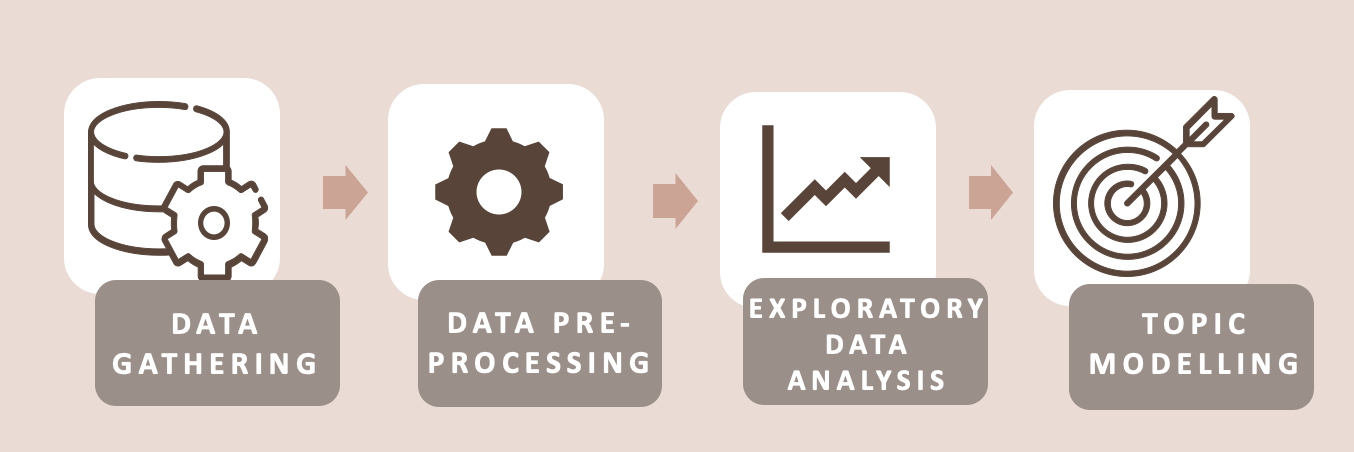

<a id=’fig1’></a> 
<center> Figure 1. Graphical representation of the workflow for extracting themes from subreddit comments.

### 1. Data Gathering

Reddit comments logged from February to April 2020 were downloaded from the Pushshift IO repository and then stored in an Amazon Web Services S3 bucket (*s3://bdccreddit2020*). Around __419,953,160__ comments were extracted which totaled to __75 GB__ in size. Then, SkincareAddiction comments were filtered out and saved as a dataframe for further processing. The task was accomplished using a Dask cluster of four 32 GB t3.2xlarge instances for workers, scheduler, and client.

In [7]:
from dask.distributed import Client
client = Client('172.31.21.2:8786')
client

Client Scheduler: tcp://172.31.21.2:8786 Dashboard: http://172.31.21.2:8787/status,Cluster Workers: 3 Cores: 24 Memory: 99.92 GB


In [66]:
def flatten(record):
    """Convert json to dataframe"""
    return {
        'link_id': record['link_id'],
        'body': record['body']
    }

# Read data from s3 bucket
bag = (db.read_text('s3://bdccreddit2020/*.gz', 
       storage_options={'anon': True, 'use_ssl': False}).map(json.loads))

# Count total number of raw comments in the file
# total_count = bag.count().compute()
##Count 75gb: 419,953,160

# Filter skincare subreddit and persist
skincare = (bag.filter(lambda category: 
                       category["subreddit"] == 'SkincareAddiction'))
skincare = skincare.persist()

# # Count total number of filtered skincare comments 
# total_skincare = skincare.compute().count()
# print("Count of skincare comments:", total_skincare)

ddf = skincare.map(flatten).to_dataframe()

In [105]:
print("Sample raw comment:\n\n", skincare.take(1)[0]['body'])

Sample raw comment:

 Yeah if you're that new to Differin you probably shouldn't have a facial and definitely not extractions. I'd highly recommend laying off of it and other actives for a good amount of time, maybe even give it a full month before you resume depending on if they did any sort of mask or peel during your treatment today.


### 2. Data Cleaning and Pre-processing

Only the skincareAddiction comments were cleaned and pre-processed for topic modelling. The text pre-processing involves:
1. Filter automated comments by reddit moderator bots that indicates comment removal or contains default subreddit FAQs
2. Group comments by submissions and consider one submission as a document
2. Convert text to lowercase to neutralize case sensitivity
2. Tokenize to break up comments into words/tokens
3. Remove punctuations and stopwords
5. Convert words to root form by performing lemmatization
6. Build bi-gram and tri-gram models using Gensim’s Phrases model 

[Table 2](#tab2) shows the sample cleaned data. 

In [124]:
def clean_text(text):     
    """Perform cleaning and preprocessing of data"""

    #make string lowercase 
    text = str(text)
    text = text.lower()
    
    #remove links
    text = (re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})'
                   '([\/\w \.-]*)', '', text, flags=re.MULTILINE))
    text = text.replace('/', ' ')
        
    #tokenize 
    tokens = nltk.word_tokenize(text)
    clean_text = []
    
    #remove stopwords, puncuation, then lemmatize
    for word in tokens:
        # Remove punctuations and special characters
        word = re.sub(r'\\n','', word)
        word = re.sub(r'\[.*?\]', '', word)
        word = re.sub(r'[^\w\s]', '', word)
        if (word not in stopwords_english and word not in string.punctuation):             
            if not word.isdigit():#re.search('\w(?:\w|\-)+', word):
                token = wordnet_lemmatizer.lemmatize(word)
                #remove 1 letter words
                token =  re.sub(r'\b[a-zA-Z]\b', '', token)
                clean_text.append(token)
                        
    return clean_text

def add_ngram(doc): 
    """Return trigrams of doc"""
    return trigram[bigram[doc]]


# "stopeng" is the extended list of stopwords for use 
stop = ["aint", "amnt", "arent", "cant", "couldve", "couldnt",
                    "daresnt", "didnt", "doesnt", "dont", "gonna", "gotta", 
                    "hadnt", "hasnt", "havent", "hed", "hell", "hes", "howd",
                    "howll", "hows", "Id", "Ill", "Im", "Ive", "isnt", "itd",
                    "itll", "its", "lets", "maynt", "mayve", "mightnt", 
                    "mightve", "mustnt", "mustve", "neednt", "oclock", "ol",
                    "oughtnt", "shant", "shed", "shell", "shes", "shouldve",
                    "shouldnt", "somebodys", "someones", "somethings", "thatll",
                    "thatre", "thats", "thatd", "thered", "therere", "theres", 
                    "thesere", "theyd", "theyll", "theyre", "theyve", "thiss",
                    "thosere", "tis", "twas", "twasnt", "wasnt", "wed", "wedve",
                    "well", "were", "weve", "werent", "whatd", "whatll", 
                    "whatre", "whats", "whatve", "whens", "whered", "wherere",
                    "wheres", "whereve", "whichs", "whod", "whodve", "wholl",
                    "whore", "whos", "whove", "whyd", "whyre", "whys", "wont",
                    "wouldve", "wouldnt", "yall", "youd", "youll", "youre", 
                    "youve", "s", "s", "said", "also", "would", "m", "n",
                    "re","ve" , "ll", "d", "t", "much", "u", "amp","ll", "i",
                    'also', 'really', 'ive', 'even', 'im', 'ill', 'lol',
                    'ugh', 'oof','yeah', 'haha' , 'oh', 'u', 'etc' ,'yes', 
                    'thing', 'go',"tho", "pih", "gt" ,"two" "one", "nt",
                    'jon', 'lot', 'could', 'many', 'thanks', 'thank', 'hi']

In [126]:
wordnet_lemmatizer = WordNetLemmatizer()
stopeng = stopwords.words('english') + stop
stopeng.extend([x.replace("\'", "") for x in stopeng])
stopwords_english = list(set(stopeng))


# Filter automated comments by bots
ddf1 = ddf.copy()
ddf1 = ddf1[~ddf1['body'].str.contains("Beep boop. ")]
ddf1 = ddf1[~ddf1['body'].str.contains("I am a bot, and this action was performed automatically.")]
ddf1 = ddf1[~ddf1['body'].str.contains("I'm afraid your post was removed")] 
ddf1 = ddf1[~ddf1['body'].str.contains("I'm afraid your post has been removed.")] 
ddf1 = ddf1[~ddf1['body'].str.contains("https://www.reddit.com/r/SkincareAddiction/wiki/")] 
ddf1 = ddf1[ddf1['body'] !='[deleted]']
ddf1 = ddf1[ddf1['body'] !='[removed]']
ddf1 = ddf1.compute()

#for checking of there are automated comments left
# ddf1a = ddf1.groupby(['body']).count().sort_values(by='link_id',ascending=False)

# Group comments by submission as one document
ddf1 = ddf1.groupby('link_id').agg(list)

# Perform cleaning on comments
ddf1['body_clean'] = ddf1['body'].apply(lambda x : clean_text(x))

# Apply n-grams
bigram = Phrases(ddf1['body_clean'], min_count=10)
trigram = Phrases(bigram[ddf1['body_clean']])
ddf1['body_ngrams'] = ddf1['body_clean'].apply(lambda x : add_ngram(x))

__Table 2. Sample pre-processed comments__

In [127]:
ddf1.sample(5)

,body,body_clean,body_ngrams
link_id,,,
t3_ez0fyt,[Your skins looks great to me you seem to red ...,"[skin, look, great, seem, red, scar, try, put,...","[skin, look, great, seem, red, scar, try, put,..."
t3_fqy7r1,[Currently I have a bunch of different things ...,"[currently, bunch, different, thing, sample, c...","[currently, bunch_different, thing, sample, co..."
t3_etatut,[Can anyone tell me what niacinamide is suppos...,"[anyone, tell, niacinamide, suppose, ordinary,...","[anyone_tell, niacinamide, suppose, ordinary, ..."
t3_fmto2b,[AHAs and BHAs are exfoliators are they not?],"[ahas, bhas, exfoliators]","[ahas_bhas, exfoliators]"
t3_f3qvoe,[Do you have a picture?],[picture],[picture]


### 3. Exploratory Data Analysis

Before implementing our LDA model, let’s look at the initial word cloud [Figure 2](#fig2) containing all the words in our pre-processed data. We can observe in the plot below that the dataset contains various skin conditions and common skin care products as its commonly recurring words.

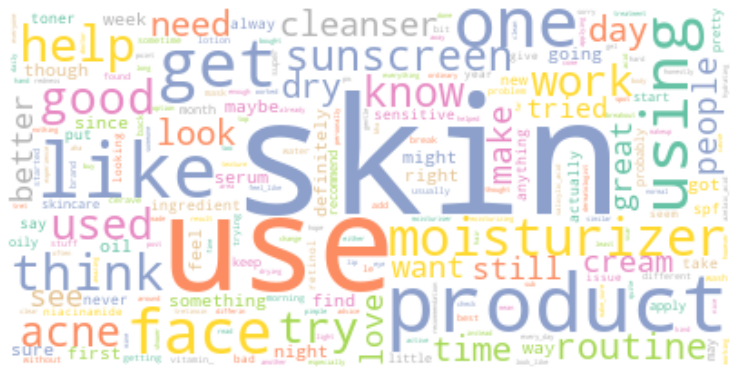

In [194]:
from gensim.summarization import keywords
from PIL import Image
from itertools import chain
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import itertools


def plot_wordcloud():
    """Return the wordcloud figure of the text"""
    text = list(itertools.chain(*ddf1['body_ngrams']))
#     color=ImageColorGenerator(mask)
    plt.subplots(figsize=(13,8))
    wordcloud = WordCloud(max_words=1000, 
#                           min_font_size=8, 
                          collocations=False,
                          colormap='Set2',
                          mode = "RGBA", background_color='white',
                          stopwords = stopwords_english
                         ).generate(' '.join(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
#     plt.savefig(f'./wordcloud/wordcloud_{label+1}.png')
#     plt.tight_layout(pad=0);
plot_wordcloud()

<a id=’fig2’></a> 
<center> Figure 2. Wordcloud of SkincareAddiction comments.

### 4. Topic Modelling

Topic modeling is a method for discovering topics that occur in a collection of documents. For this study, LDA (Latent Dirichlet Allocation) is implemented to extract the naturally discussed topics from the subreddit. LDA is a generative probabilistic model that assume each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities. The gensim library module is used to perform the LDA operation and topic coherence is selected to evaluate the models. 

Eight LDA models were explored and for every LDA model created, c_v coherence score were calculated and plotted in [Figure 3](#fig3). C_v measure is important to identify if a trained model is objectively good or bad and will allow us to compare different models/methods. Coherence measures how semantically close the top words of a topic are. A good model will generate topics with high topic coherence scores. Based on [Figure 3](#fig3), we choose 15 as the number of topics because it has the highest coherence score. 


In [128]:
# Build Dictionary & Corpus for Topic Model

#set dictionary and corpus
docs = ddf1['body_ngrams'].values
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [135]:
def compute_coherence_values(dictionary, corpus, texts, id2word, limit=40, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    chunksize = 1000
    passes = 15
    iterations = 10
    eval_every = 1  
    coherence_values = []
    model_list = []
    
    for num_topics in tqdm(range(start, limit, step)):
        model=(LdaModel(corpus=corpus, id2word=id2word, 
                       chunksize=chunksize, 
                       alpha='auto', eta='auto', 
                       random_state=100,
                       iterations=iterations, 
                       num_topics=num_topics, 
                       passes=passes))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def plot_cv_scores(coherence_values, limit=40, start=2, step=1):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [136]:
#RUN TO GET APPROPRIATE NUMBER OF TOPICS
model_list, coherence_values = (compute_coherence_values(dictionary, 
                                                         corpus, docs, id2word, 
                                                         limit=17, start=9, step=1))

100%|██████████| 8/8 [26:01<00:00, 195.23s/it]


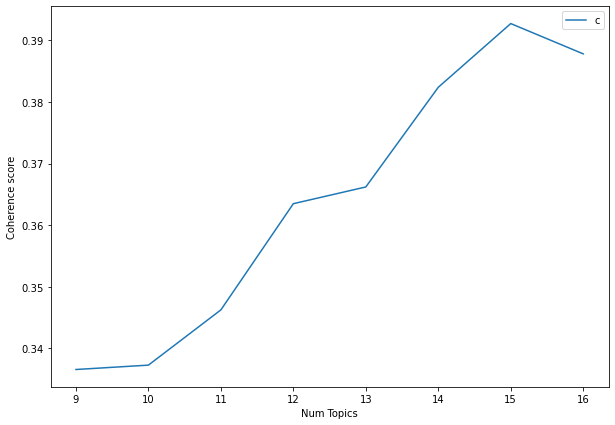

In [137]:
plt.subplots(figsize=(10,7))
plot_cv_scores(coherence_values, limit=17, start=9, step=1)

<a id=’fig3’></a> 
<center> Figure 3. Coherence values of different LDA models.

<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">RESULTS AND DISCUSSION</span></div>


The LDA model is built with 15 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. The information contained in the topic model were visualized using pyLDAvis library as shown in [Figure 4](#fig4). The larger the bubble, the more prevalent or dominant the topic is. Aside from the high coherence score, topics are scattered in different quadrants rather than being clustered on one quadrant which means that our model is good enough. 

In [129]:
opt_model =  models.LdaModel.load('./BDCC Final Project/models/lda.model')

In [130]:
# opt_model = model_list[6]
pyLDAvis.gensim.prepare(opt_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6     -0.135841  0.097946       1        1  9.935618
9     -0.118620  0.041996       2        1  9.839772
3     -0.167769 -0.010762       3        1  8.977903
2      0.154088  0.024093       4        1  8.732645
5      0.135242  0.123690       5        1  8.380515
0     -0.037224 -0.107378       6        1  6.940712
12     0.105773 -0.066855       7        1  6.874535
8     -0.124011 -0.139436       8        1  6.643849
4      0.153016 -0.108034       9        1  6.511406
14     0.136060  0.111105      10        1  6.072984
13     0.021439 -0.162791      11        1  5.619459
1     -0.059863  0.174996      12        1  4.480889
11    -0.002601  0.127709      13        1  4.184625
7      0.071945 -0.080827      14        1  3.740414
10    -0.131635 -0.025452      15        1  3.064673, topic_info=          Term          Freq         Total Category  logprob  loglift
179  sunscreen  11069.000000  11069.000000  Default  30.0000  30.0000
425   cleanser   9830.000000   9830.000000  Default  29.0000  29.0000
165    product  27589.000000  27589.000000  Default  28.0000  28.0000
65        acne  10782.000000  10782.000000  Default  27.0000  27.0000
410      serum   5625.000000   5625.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
13         try    451.510254  12065.988630  Topic15  -5.0019   0.1997
28        like    475.756736  23348.140985  Topic15  -4.9496  -0.4081
84       using    396.521358  17506.027819  Topic15  -5.1318  -0.3023
194        get    374.607605  18331.131609  Topic15  -5.1886  -0.4052
316       used    330.445855  11443.269621  Topic15  -5.3141  -0.0595

[1232 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1944      9  0.987635       100mg
1945      9  0.987422        50mg
1017      7  0.097433    accutane
1017      9  0.901774    accutane
42        2  0.951612        acid
...     ...       ...         ...
1805     13  0.913526  zinc_oxide
1775      4  0.006697         zit
1775      8  0.008929         zit
1775      9  0.075897         zit
1775     11  0.904065         zit

[4350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 4, 3, 6, 1, 13, 9, 5, 15, 14, 2, 12, 8, 11])

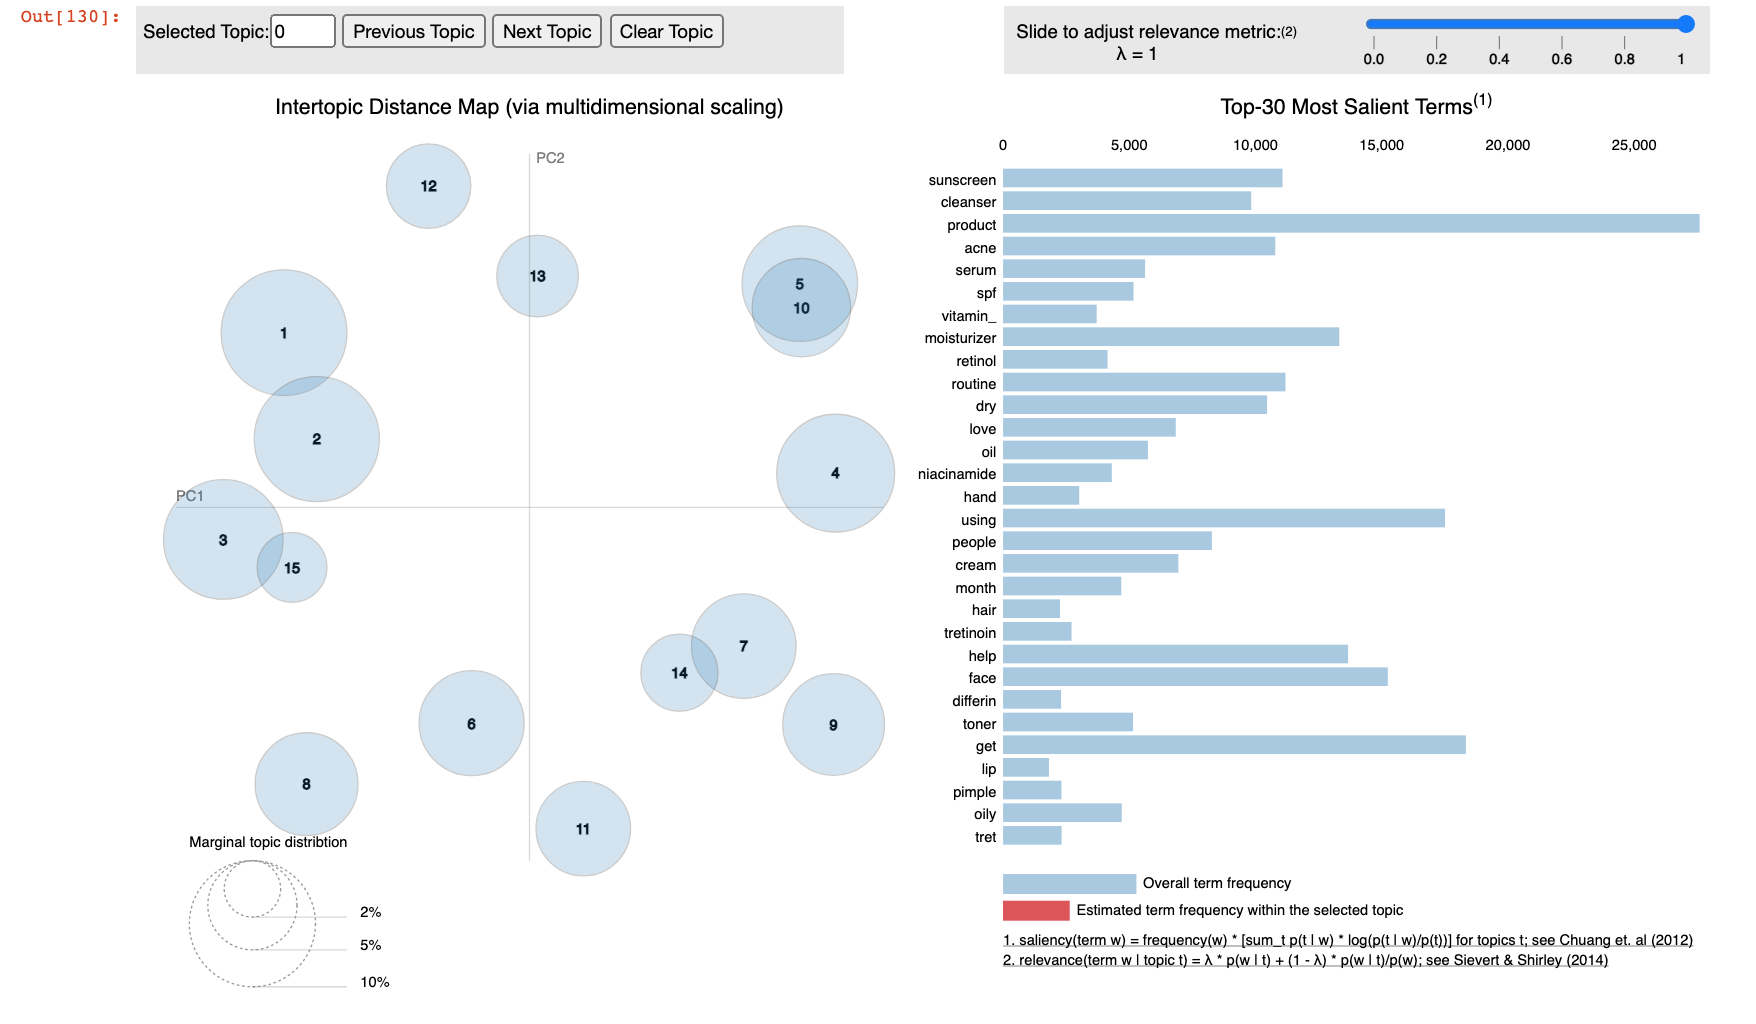

<a id=’fig4’></a> 
<center> Figure 4. Interactive Visualization of Themes Extracted.

The topic number assigned in gensim is different with that of the LDAmodel. For our labels, we will use the topic number assigned by the LDAmodel. The keywords for each topic and the weightage(importance) of each keyword are displayed in [Table 3](#tab3). 

__Table 3. Top keywords per Topic__

In [157]:
pd.set_option('display.max_colwidth', 310)
pd.DataFrame(opt_model.print_topics(num_words=10), columns=['Topic','Keywords']).set_index('Topic')

,Keywords
Topic,
0,"0.020*""product"" + 0.017*""using"" + 0.016*""face"" + 0.011*""try"" + 0.010*""issue"" + 0.010*""sensitive"" + 0.009*""cream"" + 0.009*""think"" + 0.009*""maybe"" + 0.009*""tried"""
1,"0.033*""vitamin_"" + 0.031*""serum"" + 0.028*""retinol"" + 0.026*""product"" + 0.015*""ordinary"" + 0.011*""eye"" + 0.011*""like"" + 0.010*""good"" + 0.010*""vitamin__serum"" + 0.009*""one"""
2,"0.015*""like"" + 0.011*""time"" + 0.010*""work"" + 0.010*""one"" + 0.010*""love"" + 0.010*""get"" + 0.010*""face"" + 0.007*""people"" + 0.007*""good"" + 0.007*""look"""
3,"0.046*""cleanser"" + 0.021*""oil"" + 0.019*""face"" + 0.015*""oily"" + 0.014*""product"" + 0.014*""moisturizer"" + 0.013*""routine"" + 0.011*""dry"" + 0.011*""using"" + 0.011*""good"""
4,"0.030*""acne"" + 0.012*""get"" + 0.009*""accutane"" + 0.009*""doctor"" + 0.008*""help"" + 0.008*""take"" + 0.007*""know"" + 0.006*""diet"" + 0.006*""think"" + 0.006*""year"""
5,"0.024*""people"" + 0.021*""product"" + 0.015*""like"" + 0.013*""think"" + 0.013*""ingredient"" + 0.011*""skincare"" + 0.010*""know"" + 0.009*""say"" + 0.007*""mean"" + 0.007*""brand"""
6,"0.022*""like"" + 0.022*""moisturizer"" + 0.020*""love"" + 0.017*""one"" + 0.016*""cream"" + 0.016*""dry"" + 0.011*""face"" + 0.010*""great"" + 0.010*""tried"" + 0.009*""feel"""
7,"0.024*""hair"" + 0.015*""get"" + 0.014*""body"" + 0.013*""shower"" + 0.012*""look"" + 0.011*""help"" + 0.010*""like"" + 0.009*""try"" + 0.007*""shaving"" + 0.007*""treatment"""
8,"0.031*""acne"" + 0.023*""using"" + 0.020*""routine"" + 0.018*""tretinoin"" + 0.016*""differin"" + 0.015*""tret"" + 0.013*""help"" + 0.012*""week"" + 0.012*""moisturizer"" + 0.011*""azelaic_acid"""


Topic 1 is a represented as 0.033*"vitamin_" + 0.031*"serum" + 0.028*"retinol" + 0.026*"product" + 0.015*"ordinary" + 0.011*"eye" + 0.011*"like" + 0.010*"good" + 0.010*"vitamin__serum" + 0.009*"one".

It means the top 10 keywords that contribute to this topic are: ‘vitamin_’, ‘serum’, ‘retinol’.. and so on and the weight of ‘vitamin_’ on topic 1 is 0.033. The weights reflect how important a keyword is to that topic.

Looking at these keywords, we identify an underlying theme for each cluster. Analyzing [Figure 4](#fig4) and [Table 3](#tab3), the underlying theme for each cluster were identified as follows: 

**Cluster 1 (Other Skin Issues); Cluster 2 (Brightening); Cluster 3 (Feedbacks); Cluster 4 (Facial Cleansers); Cluster 5 (Severe Acne); Cluster 6 (Tips); Cluster 7 (Hydration); Cluster 8: (Body Skincare); Cluster 9 (Acne Product Ingredients); Cluster 10 (Product Ingredients); Cluster 11 (Lip Care); Cluster 12 (Sun Protection); Cluster 13 (Scars); Cluster 14 (Acne General Issues); Cluster 15 (Recommendations)**


The distribution of each clusters is displayed in [Figure 5](#fig5). Cluster 9 (Acne Product Ingredients), Cluster 7 (Hydration) and Cluster 4 (Facial Cleansers) dominates the cluster in terms of count. 


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


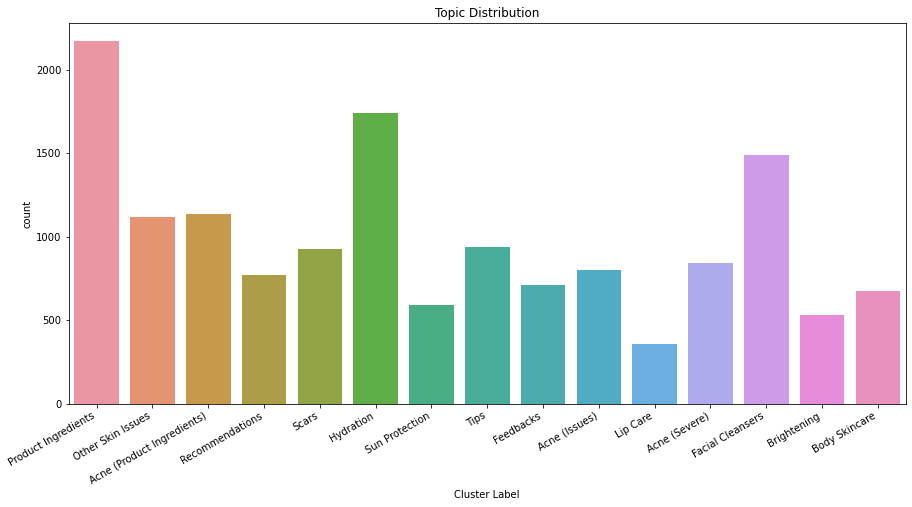

In [13]:
# Assign label for each topic and get distribution 

topics = {0: 'Other Skin Issues', 1: 'Brightening', 
          2: 'Feedbacks, Tips, Recommendations',
          3: 'Facial Cleansers', 4: 'Acne', 
          5: 'Feedbacks, Tips, Recommendations',
          6: 'Hydration', 7: 'Body Skincare', 8: 'Acne', 
          9: 'Product Ingredients', 10: 'Lip Care', 11: 'Sun Protection',
          12:'Scars', 13:'Acne', 14: 'Feedbacks, Tips, Recommendations'}
label_desc = {0: 'Other Skin Issues', 1: 'Brightening', 2: 'Feedbacks',
          3: 'Facial Cleansers', 4: 'Acne (Severe)', 5: 'Tips',
          6: 'Hydration', 7: 'Body Skincare', 8: 'Acne (Product Ingredients)', 
          9: 'Product Ingredients', 10: 'Lip Care', 11: 'Sun Protection',
          12:'Scars', 13:'Acne (Issues)', 14: 'Recommendations'}
            
topic_dist = opt_model.get_document_topics(corpus)
label = [sorted(topic_dist[i],key=lambda x: -x[1])[0][0] 
          for i in range(len(ddf1))]
ddf1['label'] = label
ddf1['label_desc'] = ddf1['label'].replace(label_desc)
ddf1['topic'] = ddf1['label'].replace(topics)


# plot distribution
plt.subplots(figsize=(15,7))
plt.title("Topic Distribution")
sns.countplot(ddf1['label_desc'], data=ddf1)
plt.xlabel("Cluster Label")
plt.xticks(rotation=30,horizontalalignment='right');

<a id=’fig5’></a> 
<center> Figure 5. Topic Distribution

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. We extracted the dominant topic for each submission and is summarized in [Table 4](#tab4). With this, we will know which document belongs predominantly to which topic.

In [208]:
# data = list(itertools.chain(*ddf1['body_ngrams'].values.tolist()))
data = ddf1['body_ngrams'].values.tolist()

In [209]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = (sent_topics_df.append(pd.Series([int(topic_num), 
                        round(prop_topic,4), topic_keywords]), ignore_index=True))
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

__Table 4. Dominant topic and its percentage contribution in each document__

In [210]:
import itertools

df_topic_sents_keywords = format_topics_sentences(ldamodel=opt_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.1095,"product, using, niacinamide, routine, moisturizer, one, acid, need, toner, start",[]
1,1,0.0,0.3187,"product, using, face, try, issue, sensitive, cream, think, maybe, tried","[give, urea_cream, try, help, dealing, dehydrated, skin, month, literally, tried, everything_except, urea, trying, see, worked, people, actually, try, work, actually, irritated, skin, made, skin, worse]"
2,2,8.0,0.2370,"acne, using, routine, tretinoin, differin, tret, help, week, moisturizer, azelaic_acid","[completely, second, like, necessary, kind, start_slowly, gradual, improvement, noticeable, clearing, congestion, angry_pimple, still, breakout, bit]"
3,3,0.0,0.3307,"product, using, face, try, issue, sensitive, cream, think, maybe, tried","[stop_using, hydrocortisone, eyelid, ask_doctor, protopic, ointment, steroid, safer, thin]"
4,4,14.0,0.2183,"product, one, buy, get, amazon, brand, know, post, like, bought","[look_amazing, know, name, kind, acid, fill, got, lt, received, hyaluronic_acid, filler, pitted_scarring, received, treatment, four, time, across, span, year, month]"
5,5,12.0,0.3875,"month, used, scar, time, week, definitely, work, get, got, result","[hey, x200b, start, treatment, hey, session_microneedling, seen, improvementi, actually, going, rf_microneedling, tomorrow, difference]"
6,6,8.0,0.2522,"acne, using, routine, tretinoin, differin, tret, help, week, moisturizer, azelaic_acid","[started_getting, ton, clogged_pore, forehead, year, never, issue, acne, either, soooo, frustrating, thing, usually, oil, using, moisturizers, protini, usually, keep_bay, acid, differin, always, return, somewhat]"
7,7,14.0,0.1620,"product, one, buy, get, amazon, brand, know, post, like, bought","[always, use, burner, card, free_trial, use]"
8,8,6.0,0.1596,"like, moisturizer, love, one, cream, dry, face, great, tried, feel","[second, literally, invisible, tiny_bit, shiny, waiting, see, break]"
9,9,11.0,0.5850,"sunscreen, spf, sun, one, look, face, makeup, good, day, like","[check, mineral, matte, tint, website, variant31197576560682a, universally, flattering, tint, offer, light_coverage, mattifying, finish, even, look, imperfection]"


In the previous sections, we described how we implemented an LDA model to extract key topics of the `r/SkincareAddiction` subreddit. In this section, we interpret the resulting clusters by plotting their corresponding word clouds. Then, we identify actionable insights based that can be derived from the resulting topics.
The succeeding codes would plot the word cloud of each cluster. In this section, we grouped the clusters based on their functionality. 


In [83]:
from gensim.summarization import keywords
from PIL import Image
from itertools import chain
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import itertools


def plot_wordcloud(label, ax=None):
    """Returns the wordcloud figure of the topic"""
    
    if ax is None:
        ax = plt.gca()
    
    text = list(itertools.chain(*ddf1[ddf1.label==label]['body_ngrams']))
    mask_path = f'./BDCC Final Project/icons/{label+1}.png'
    mask = np.array(Image.open(mask_path))
#     color=ImageColorGenerator(mask)
#     plt.subplots(figsize=(5,5))
    wordcloud = WordCloud(max_words=150, 
                          min_font_size=8, mask=mask, #prefer_horizontal=0.75, 
                          collocations=False,
                          colormap='Set2',
                          mode = "RGBA", background_color='white',
                          stopwords = stopwords_english
                         ).generate(' '.join(text))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off');
#     plt.savefig(f'./wordcloud/wordcloud_{label+1}.png')
#     ax.tight_layout(pad=0);


<p><font color=#c28285 size=5><b>A. Facial Care Clusters</b></font></p>


The largest among the group of topics is facial care. These themes are visualized in [Figure 6](#fig6). This is expected since facial care is the most popular category in the skin care industry. In the Philippines, facial care category constitutes 63% of the total retail sales value of the skin care market. Below are some brief descriptions of topics formed that belong to this group:
1. **Severe Acne** - This cluster shows comments that are generally discussing severe acne problems. Most people would ask for help or suggest going to the doctor to treat severe acne. A notable brand that was shown in this cluster is Accutane, which is a popular brand that is usually used to treat severe acne.
2. **Acne Issues**- The topic in this cluster focuses on generic acne issues. Reddit users would generally discuss less severe acne symptoms. 
3. **Acne Product Ingredients**- In this cluster, acne product ingredients are commonly discussed. Some examples are the mention of ingredients such as azelaic acid and salicylic acid. There are also mentions of other acne products such as tretinoin and Differin.
4. **Bright Skin** - This cluster tackles products that are mainly used for skin brightening. Popular product features that are mentioned are niacinamide, retinol, and serum.
5. **Hydration** - This cluster focuses on skin-hydrating products. CeraVe, a popular moisturizer and cleanser brand, was mentioned in this cluster.
6. **Sun Protection** - Products used for sun protection is the theme of this cluster. There are frequent mentions of SPF, sunscreen, and UV. 
7. **Scars** - In this cluster, redditors would discuss the length of time it takes for scars to heal. There are also product recommendations used to treat scars. CeraVe is also a key brand that is frequently mentioned in this cluster.
8. **Other Skin Conditions** - This is a cluster that discusses generic skin conditions. Less popular skin conditions would also belong to this group. Some examples are redness, rosacea, and allergic reactions.


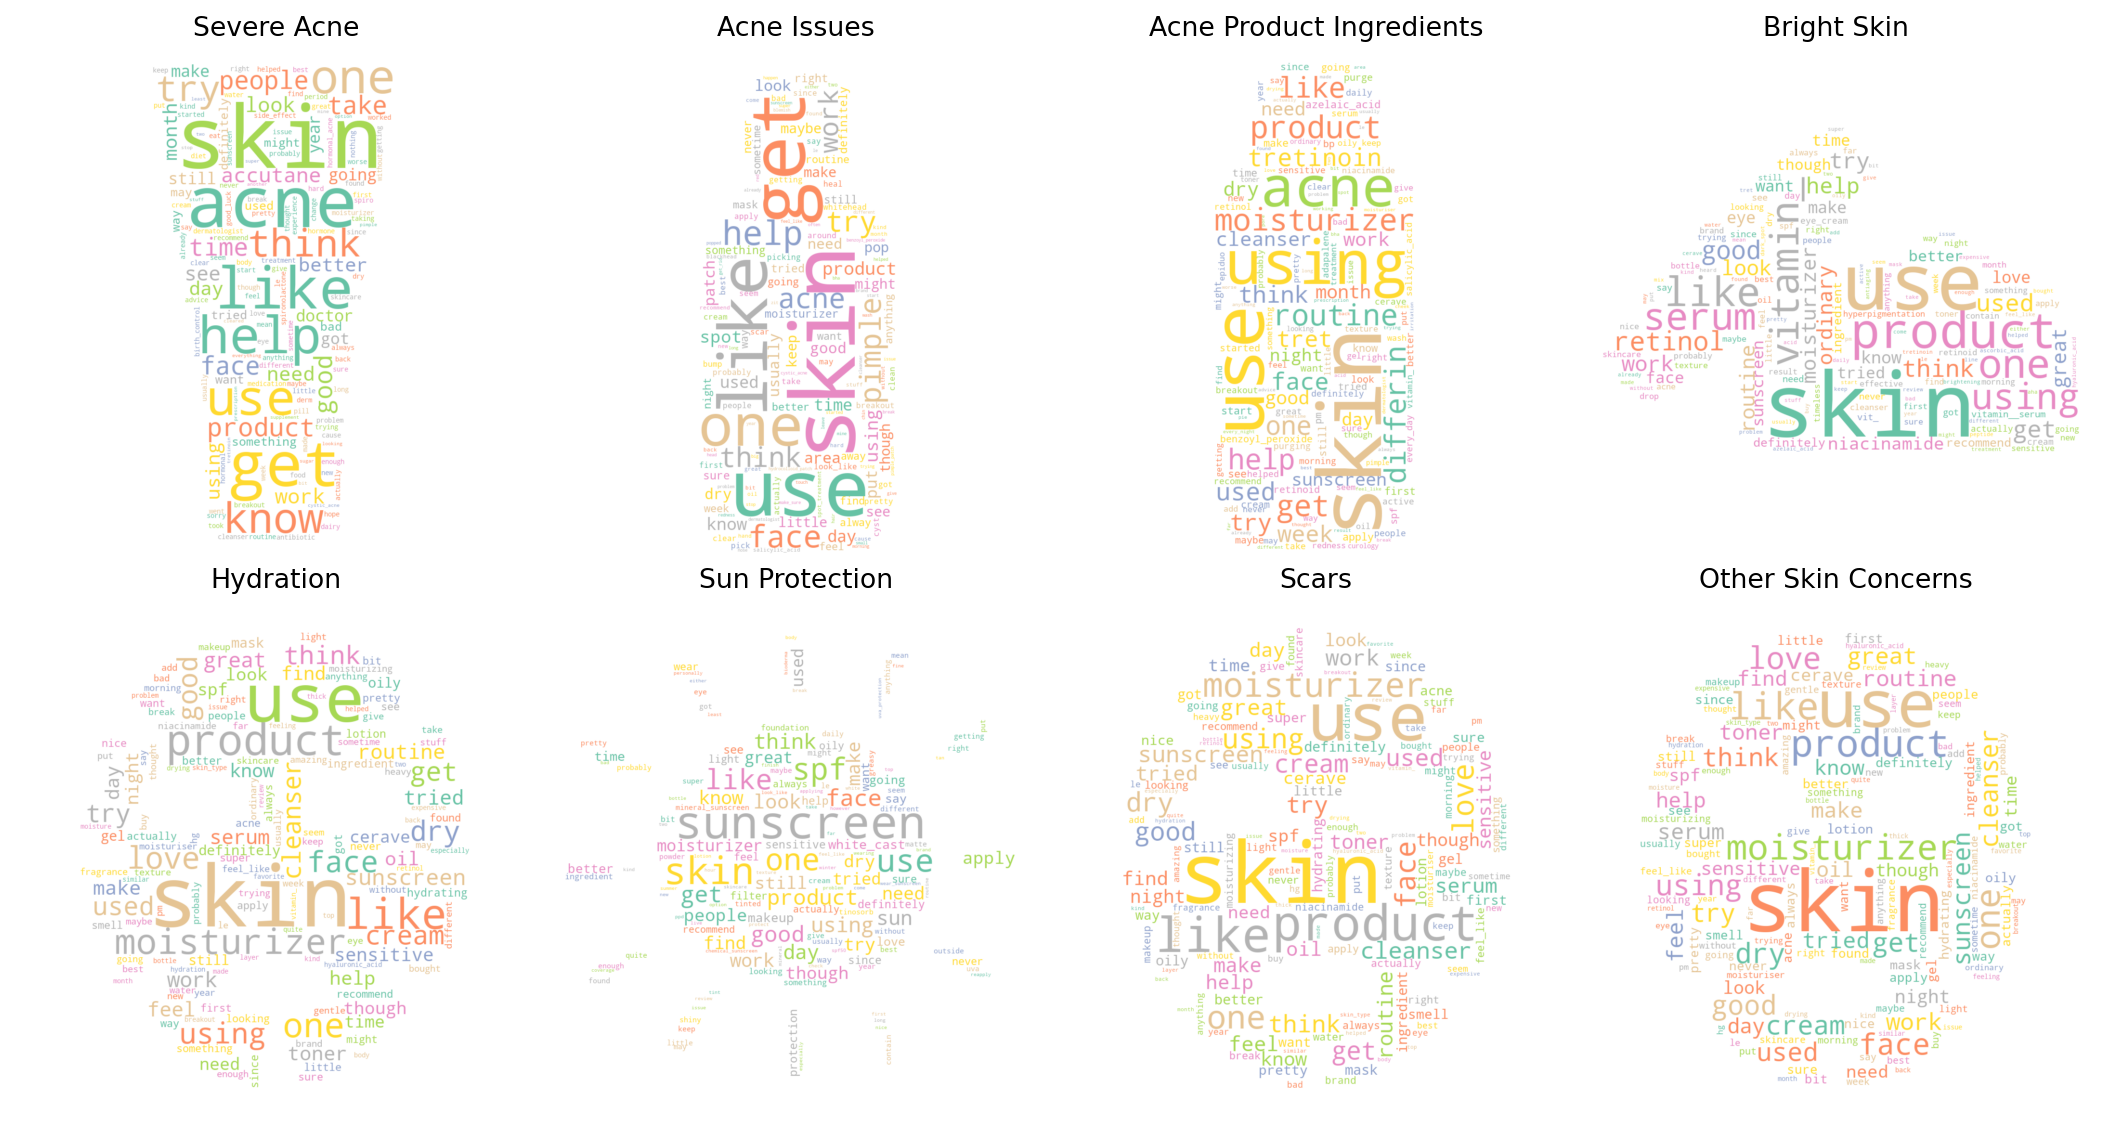

In [112]:
plt.close()
f, (ax) = plt.subplots(2, 4, figsize=(13,7), dpi=160)
plot_wordcloud(4, ax[0][0])
ax[0][0].set_title("Severe Acne")

plot_wordcloud(13, ax[0][1])
ax[0][1].set_title("Acne Issues")

plot_wordcloud(8, ax[0][2])
ax[0][2].set_title("Acne Product Ingredients")

plot_wordcloud(1, ax[0][3])
ax[0][3].set_title("Bright Skin")

plot_wordcloud(6, ax[1][0])
ax[1][0].set_title("Hydration")

plot_wordcloud(11, ax[1][1])
ax[1][1].set_title("Sun Protection")

plot_wordcloud(6, ax[1][2])
ax[1][2].set_title("Scars")

plot_wordcloud(6, ax[1][3])
ax[1][3].set_title("Other Skin Concerns")

plt.tight_layout(pad=0);

<a id=’fig6’></a> 
<center> Figure 6. Facial care clusters


<p><font color=#c28285 size=5><b>B. Lip and Body Skin Care Clusters</b></font></p>


Comments that belong in these clusters ([Figure 7](#fig7)) would generally have product suggestions, review, or tips that are focused on lip and body care. 

1. **Lip Care** - This cluster describes skin care products that are used for the lips. Some of the brands mentioned are Vaseline and Aquaphor. We also noticed that eczema was commonly mentioned in this cluster, which means that some users are discussing lip dermatitis. 

2. **Body Care** - The theme in this cluster shows a focus on body care treatment. Some of the popular words in this cluster are body, hair, and lotion. The frequent mention of shaving could also imply that this cluster includes hair care products. 

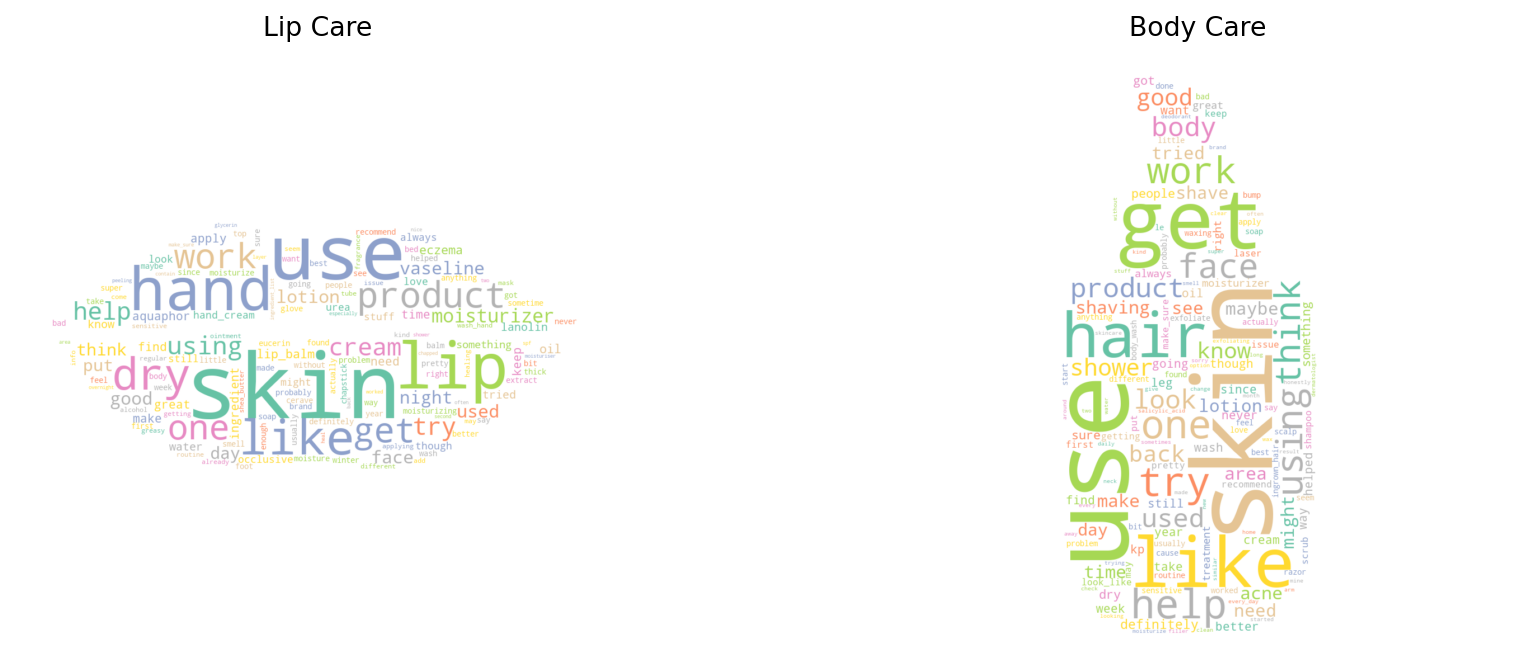

In [115]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5),dpi=160)
plot_wordcloud(10, ax1)
ax1.set_title("Lip Care")

plot_wordcloud(7, ax2)
ax2.set_title("Body Care");

<a id=’fig7’></a> 
<center> Figure 7. Lip and body care clusters


<p><font color=#c28285 size=5><b>C. Skincare Product Clusters</b></font></p>


In this group, we focus on product-centric clusters. These clusters focus on highlighting product features rather than specific skin conditions. These comments are displayed in [Figure 8](#fig8). 

1. **Facial Cleansers** - This cluster shows products that are used to treat dry and oily skin. There’s frequent mention of moisturizer and toner.  

2. **Product Ingredients** - In contrast to the acne product ingredients, this cluster has a broader coverage in terms of the ingredients mentioned. The Ordinary, which is a popular skin care brand, was frequently mentioned in this cluster. 

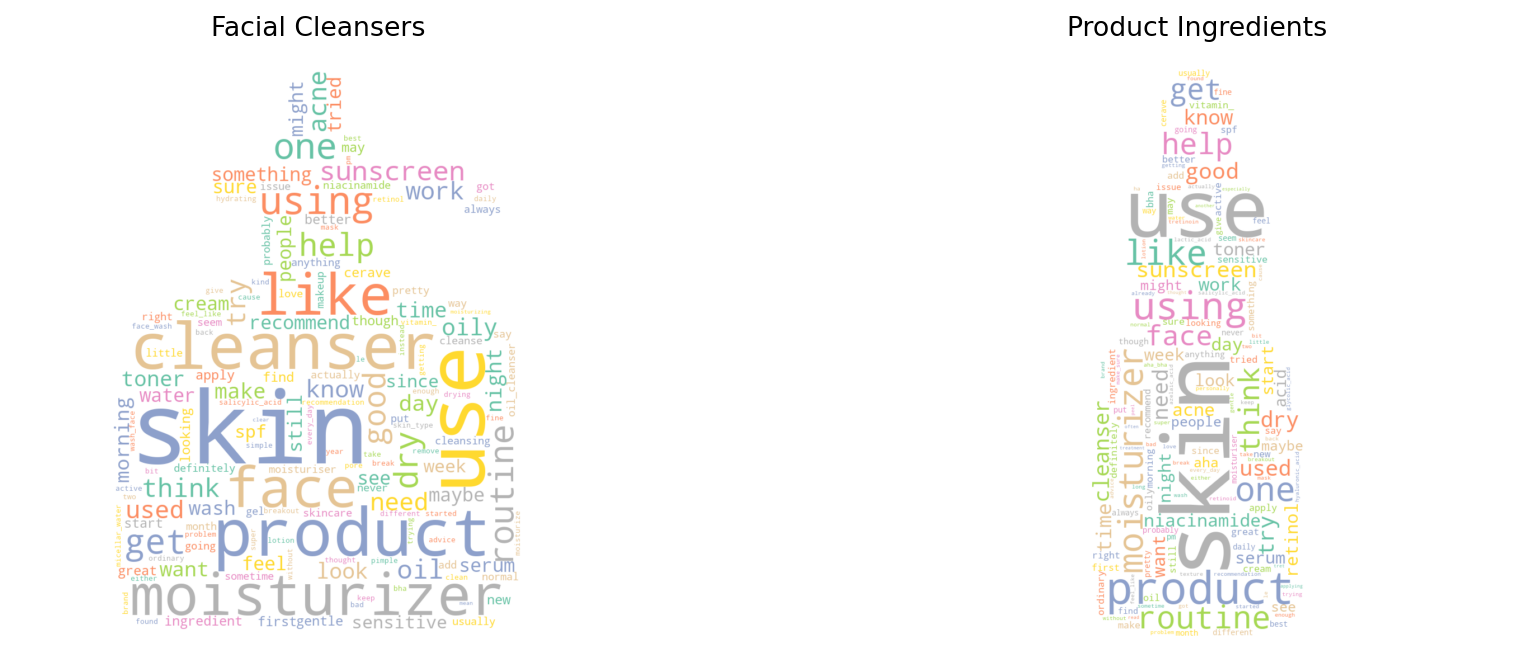

In [116]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(13,5),dpi=160)
plot_wordcloud(3, ax1)
ax1.set_title("Facial Cleansers")

plot_wordcloud(9, ax2)
ax2.set_title("Product Ingredients");

<a id=’fig8’></a> 
<center> Figure 8. Skincare product clusters


<p><font color=#c28285 size=5><b>D. Feedback, Tips and Recommendation Clusters</b></font></p>


These clusters ([Figure 9](#fig9)) are grouped together since these are comments that are generally used to help other users get more information. 

1. **Feedback** - In this cluster, users review products based on their own experience. Through this, other users will have a better idea on its effect based on their skin characteristics.  

2. **Tips** - In this cluster, users discuss tips on skin care routines, product ingredients, and skin care brands. This cluster would provide other users a starting point in researching for their ideal skin care products. 

3. **Recommendations** - This are usually recommendations on where people can source high-quality skin care products. There’s a frequent mention of Amazon, which is a popular channel for sourcing skin care products. 

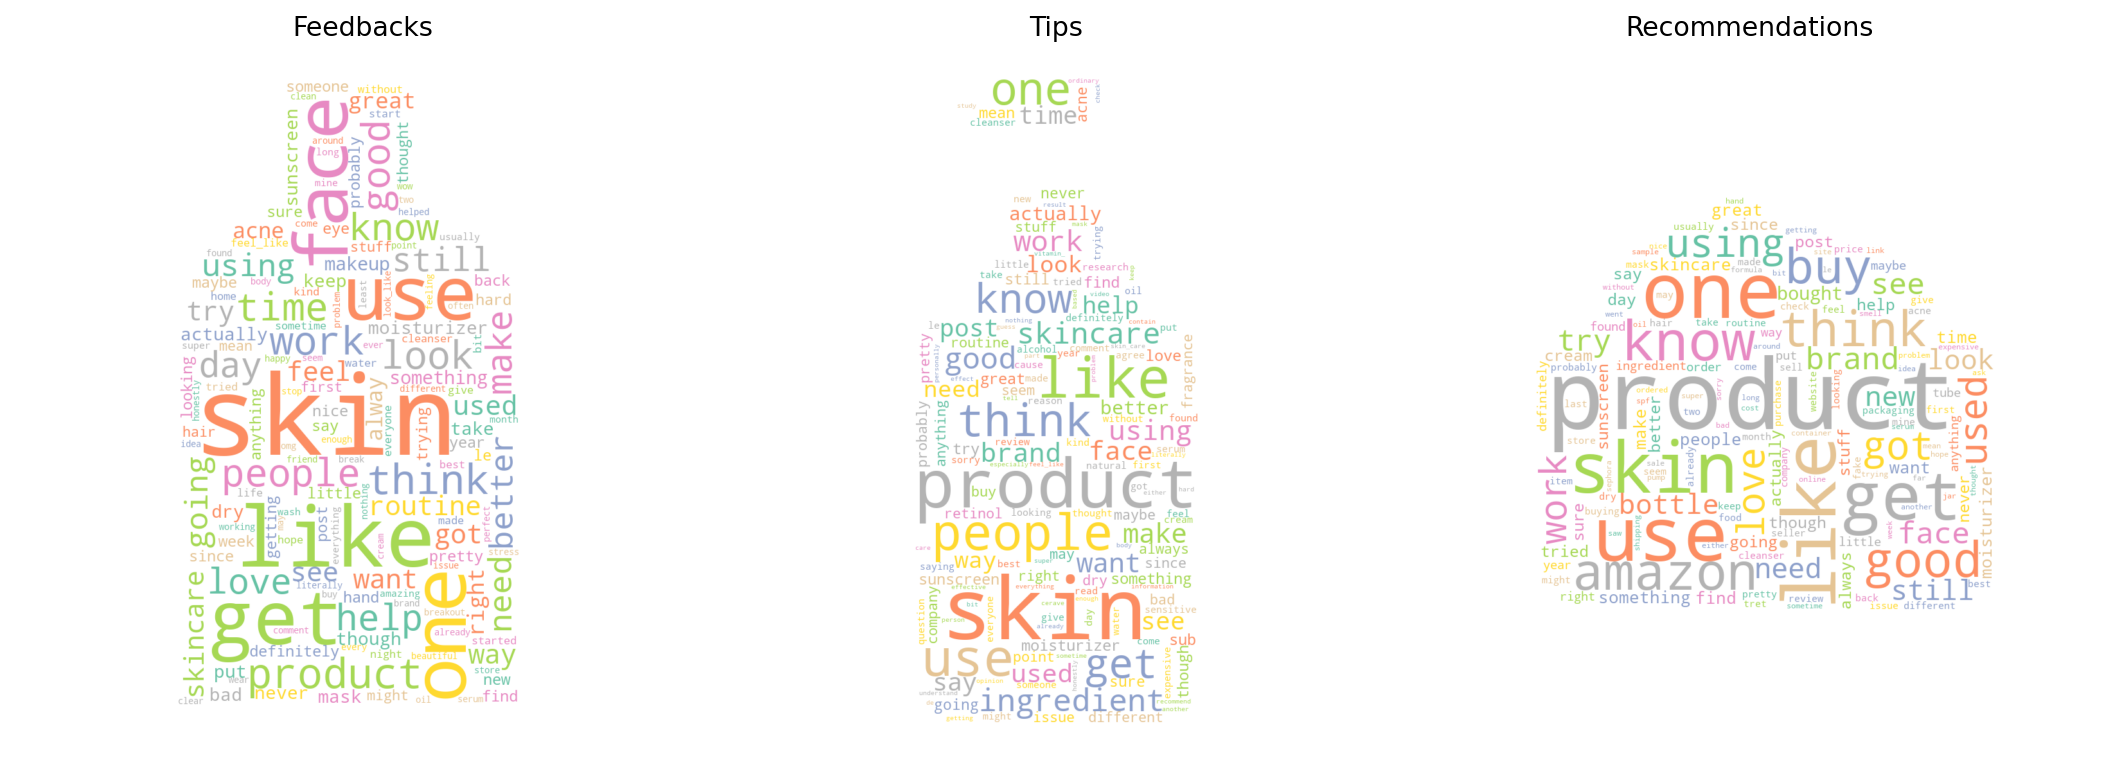

In [118]:
plt.close()
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(13,5), dpi=160)
plot_wordcloud(2, ax1)
ax1.set_title('Feedbacks')
plot_wordcloud(5, ax2)
ax2.set_title('Tips')
plot_wordcloud(14, ax3)
ax3.set_title('Recommendations')
plt.tight_layout(pad=0);

<a id=’fig9’></a> 
<center> Figure 9. Feedback, Tips and Recommendation Clusters

Reddit provides us an accessible source of information, which are generated by other users that have similar interests. In this project, we used an LDA model to extract topics from the `r/SkincareAddiction` subreddit comments. By extracting these themes, we’ve derived three main insights in this study: 

1. We’ve **identified key brands** for common skin care problems. Brands such as Differin (Acne), CeraVe (Hydration), The Ordinary (Bright Skin), Vaseline (Lip Care), and Aquaphor (Lip Care) are commonly mentioned in some of the clusters. As a consumer, we could use this as a starting point in searching for the appropriate brands for specific skin care conditions or objective. On the other hand, online resellers can use this to expand their product selections. Lastly, skin care corporations can use this to evaluate their marketing campaign. If they target specific time frames, they can evaluate if their brand was frequently mentioned in the Reddit community discussions during the campaign period. 

2. In forming the topics, we’ve also **uncovered popular product ingredients**. On the consumer’s perspective, they can use this to identify effective product ingredients for their specific skin characteristics. For skin care manufacturers, they can use this as a baseline on how to differentiate their products. Also, this can provide trends in popular ingredients. Some ingredients may only be temporarily popular. They can use this information in developing new products and differentiating their products with more unique ingredients. 

3. As our last insight, the clusters we formed *(defined key areas in the skin care market**. These areas are common skin conditions that companies can use to develop niche skin care products. They can also segment the categories of the skin care industry in such a way to simplify their market positioning. They can strategize to penetrate the less competitive skin care categories to achieve sustainable growth. 


<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">RECOMMENDATIONS</span></div>



For future works, the group believes that the actual amounts mentioned could be mined and analyzed as well. Though specific brands and ingredients can give fascinating insights into consumer behavior, the addition of how much of the product they use could help businesses determine the best amounts to sell on the market. If consumers mention that they can never finish the product due to its volume, then business can opt to sell their products at much lower quantities. This is not just ensuring that there is minimal wastage, but to ensure that the profits per volume are maximized.

It may also pay off to examine the effects of using different clustering techniques. This is not to say that the specific technique used in this study is lacking, but other clustering algorithms may yield insight and perspectives that would be much more novel and unique. If a company can find an interesting niche concern, they could benefit greatly from capitalizing on it.

Another recommendation would be time series analysis on the data. The clusters formed by the algorithm is time agnostic, meaning that the results are generated purely based on word frequency. However, adding a recency weight to certain topics could prove useful. As the world of beauty and fashion does follow seasonal trends, this form of analysis could greatly enrich future studies. 


<div><span style="background-color: #e0ad9e; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">REFERENCES</span></div>


[1] Anuwong, W. (2020). Skin Care in the Philippines Analysis. *Country Report*. Euromonitor International.

[2] https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#13viewthetopicsinldamodel

[3] https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920